# Анализ бизнес-показателей приложения Procrastinate Pro+

Поступила задача от маркетингового отдела развлекательного приложения Procrastinate Pro+. Сложилась такая ситуация, что за прошедшие несколько месяцев был выделен большой бюджет на привлечение новых пользователи, но проведенная работа не принесла положительного результата и компания терпит убытки. Необходимы выяснить причины неэффективности проведенной работы по рекламной кампании. Менеджеры предоставили доступ к серверу с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27. Также на сервере отражена статистика рекламных расходов. Задача - провести анализ данных и выяснить, как пользователю ведут себя в использовании приложения, когда и по каким причинам начинают совершать покупки, окупается ли реклама и какие факторы отрицательно влияют на привлечение пользователей.

<h1>Содержание<span class="tocSkip"></span></h1>
</a></span><li><span><a  href="#Изучение данных из файла" data-toc-modified-id="Изучение данных из файла"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Написание функций" data-toc-modified-id="Написание функций"><span class="toc-item-num">2&nbsp;&nbsp;</span>Написание функций</a></span></li><li><span><a href="#Написание функций"<span><a href="#Исследовательский анализ данных" data-toc-modified-id="Исследовательский анализ данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий вывод" data-toc-modified-id="Общий вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
# импортировала необходимые библиотеки:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#прочитала файл '/datasets/visits_info_short.csv' и сохранила в переменуую visits, получила общую информацию о таблице

visits = pd.read_csv('/datasets/visits_info_short.csv')
display(visits.head())
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


# Описание данных таблицы visits (лог сервера с информацией о посещениях сайта):

- User Id — уникальный идентификатор пользователя
- Region - страна пользователя
- Device — категория устройства пользователя
- Channel — идентификатор рекламного источника, из которого пришел пользователь
- Session start — дата и время начала сессии
- Session End — дата и время окончания сессии

В таблице visits 6 столбцов, во всех строках одинаковое количество данных, то есть пропусков не выявлено. Необходимо привести наименования столбцов к нижнему регистру по правилам хорошего стиля, изменить формат данных в столбцах Session Start и Session End, проверить таблицу на дубликаты.

In [3]:
#проверяем таблицу на наличие дубликатов

visits.duplicated().sum()

0

Дубликатов в таблице visits не выявлено.

In [4]:
# наименования значений столбцов visits приведены к нижнему регистру

visits.columns = visits.columns.str.lower()

In [5]:
# переименовываем столбцы по правилам хорошего стля для удобства работы

visits = visits.rename(columns={'user id': 'user_id'})
visits = visits.rename(columns={'session start': 'session_start'})
visits = visits.rename(columns={'session end': 'session_end'})

#display(visits.head()) 

In [6]:
# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
#прочитала файл '/datasets/orders_info_short.csv' и сохранила в переменуую orders, получила общую информацию

orders = pd.read_csv('/datasets/orders_info_short.csv')
display(orders.head())
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


# Описание данных таблицы orders (информация о заказах):

- User Id — уникальный id пользователя, который сделал заказ
- Event Dt — дата и время покупки
- Revenue — выручка

В таблице orders 3 столбца, пропусков в таблице не выявлено, таблицу необходмо проверить на дубликаты, переименовать столбцы и изменить формат даты столбца Event Dt.

In [8]:
#проверяем таблицу на наличие дубликатов

orders.duplicated().sum()

0

Дубликатов в таблице orders не найдено.

In [9]:
# наименования значений столбцов visits приведены к нижнему регистру

orders.columns = orders.columns.str.lower()

In [10]:
# переименовываем столбцы по правилам хорошего стля для удобства работы

orders = orders.rename(columns={'user id': 'user_id'})
orders = orders.rename(columns={'event dt': 'event_dt'})

In [11]:
# преобразуем данные о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#display(orders.head())

In [12]:
#прочитала файл '/datasets/costs_info_short.csv' и сохранила в переменуую costs, получила общую информацию

costs = pd.read_csv('/datasets/costs_info_short.csv')
display(costs.head())
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


# Описание данных таблицы costs_short (информация о затратах на маркетинг):

- Channel — идентификатор рекламного источника
- Dt — дата
- Costs — затраты на этот рекламный источник в этот день

В таблице costs 3 столбца, пропусков не выявлено, проверяем таблицу на дубликты, переименовываем столбцы и меняем формат даты.

In [13]:
costs.duplicated().sum()

0

Дубликатов в таблице не выявено

In [14]:
# наименования значений столбцов visits приведены к нижнему регистру

costs.columns = costs.columns.str.lower()

In [15]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#display(costs.head())

Проведена предобработка данных, можно переходить к анализу данных.

## Написание функций

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

А также функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [23]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим недельный горизонт анализа.

In [24]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Определим минимальную и максимальную даты привлечения пользователей

In [25]:
# доступный интервал привлечения пользователей
min_analysis_date = visits['session_start'].min()
observation_date = visits['session_start'].max()  

min_analysis_date_1 = visits['session_end'].min()
observation_date_1 = visits['session_end'].max() 

print(min_analysis_date)
print(observation_date)
print(min_analysis_date_1)
print(observation_date_1)

2019-05-01 00:00:41
2019-10-31 23:59:23
2019-05-01 00:07:06
2019-11-01 01:38:46


Получим профили пользователей. Для этого вызовем функцию get_profiles()

In [26]:
# получаем профили пользователей

events = None
profiles = get_profiles(visits, orders, events, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Результат — 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя использовать приложение Procrastinate Pro+.

Имея готовые профили пользователей, легко узнать количество привлечённых каждым источником посетителей. 

In [27]:
table_channel = profiles.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)
table_channel['percent'] = (table_channel['user_id']/table_channel['user_id'].sum())*100
display(table_channel)

,user_id,percent
channel,,
organic,56439,37.623993
FaceBoom,29144,19.428297
TipTop,19561,13.039971
OppleCreativeMedia,8605,5.736361
LeapBob,8553,5.701696
WahooNetBanner,8553,5.701696
RocketSuperAds,4448,2.965175
MediaTornado,4364,2.909178
YRabbit,4312,2.874513


In [28]:
profiles.groupby('channel').agg({'payer': ['mean', 'sum', 'count'] })

payer             
                        mean   sum  count
channel                                  
AdNonSense          0.113402   440   3880
FaceBoom            0.122049  3557  29144
LeapBob             0.030633   262   8553
MediaTornado        0.035747   156   4364
OppleCreativeMedia  0.027077   233   8605
RocketSuperAds      0.079137   352   4448
TipTop              0.096007  1878  19561
WahooNetBanner      0.052964   453   8553
YRabbit             0.038265   165   4312
lambdaMediaAds      0.104700   225   2149
organic             0.020553  1160  56439

Пострим график, отображающий динамику привлечения новых пользователей по каждому из рекламных каналов. Применим метод plot():

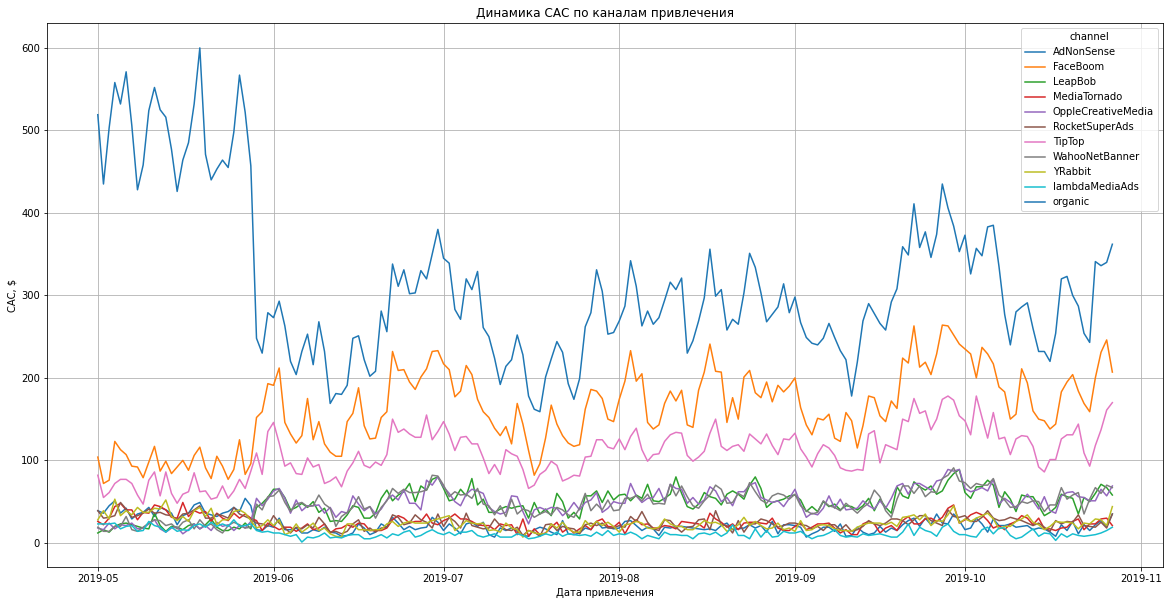

In [29]:

%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique',  # подсчёт уникальных значений
).plot(figsize=(20, 10), grid=True)

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')

plt.show()

Чаще всего приходили из источника Organic, а реже всего — из lambdaMediaAds. Все источники отличаются стабильностью: количество привлекаемых ими пользователей не опускается ниже определённого уровня. Наблюдается только всплеск по источнику Organic в первый месяц (с мая по июнь) - далее в среднем привлекалось не менее 200 новых пользователей, также виден прирост в период с сентября по октябрь - это значение превышало 400 новых пользователей.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [30]:
table_region = profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)
table_region['percent'] = (table_region['user_id']/table_region['user_id'].sum())*100
display(table_region)

,user_id,percent
region,,
United States,100002,66.664445
UK,17575,11.716042
France,17450,11.632713
Germany,14981,9.986801


In [31]:
profiles.groupby('region').agg({'payer': ['mean', 'sum', 'count'] })

payer              
                   mean   sum   count
region                               
France         0.037994   663   17450
Germany        0.041119   616   14981
UK             0.039829   700   17575
United States  0.069019  6902  100002

Пострим график, отображающий динамику привлечения новых пользователей по каждому региону. Применим метод plot():

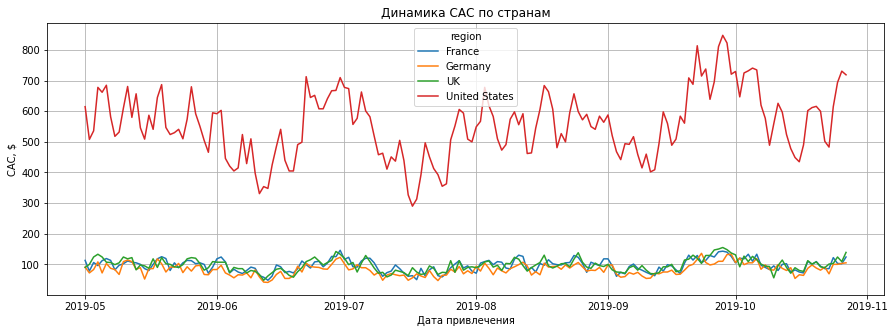

In [32]:
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='region',  # регион переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique',  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по странам')

plt.show()

Чаще всего приходили из региона США, по всем остальным регионам наблюдается примерно одинаковое количество - примерно 100 новых пользователей.

In [33]:
profiles.groupby('device').agg({'payer': ['mean', 'sum', 'count'] })


payer             
             mean   sum  count
device                        
Android  0.058518  2050  35032
Mac      0.063644  1912  30042
PC       0.050468  1537  30455
iPhone   0.062079  3382  54479

Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

In [34]:
table_device = profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)
table_device['percent'] = (table_device['user_id']/table_device['user_id'].sum())*100
display(table_device)

,user_id,percent
device,,
iPhone,54479,36.317396
Android,35032,23.353421
PC,30455,20.302251
Mac,30042,20.026932


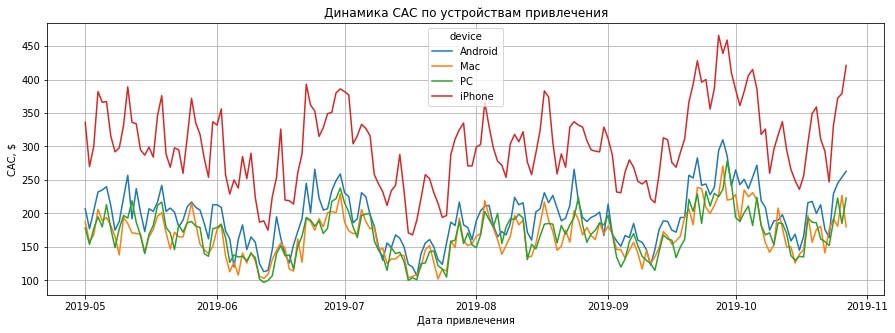

In [35]:
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='device',  # устройство переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique',  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по устройствам привлечения')

plt.show()

Чаще всего приходили пользователи iPhone, по всем остальным устройсвам наблюдается примерно одинаковое количество - примерно 250 новых пользователей.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

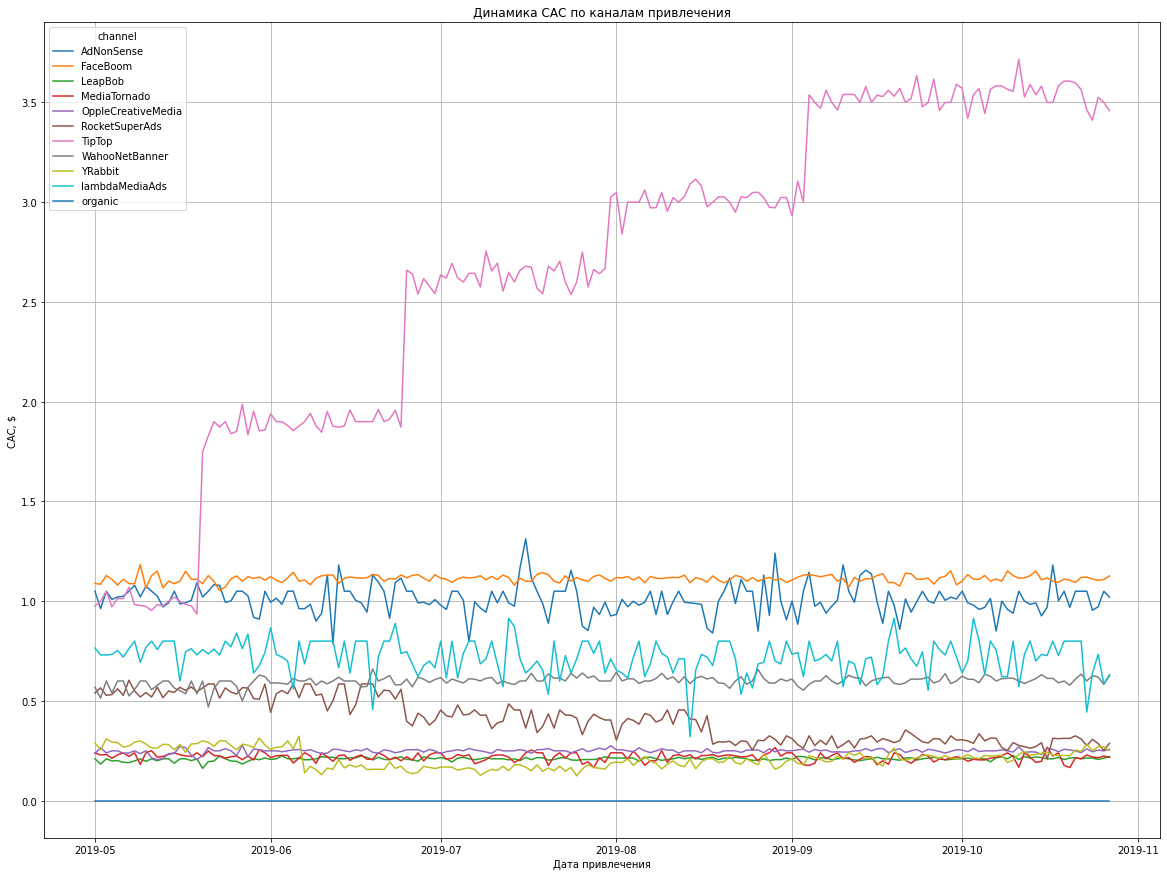

In [36]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 15))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Стоимость привлечения «органических» пользователей во всех когортах равна нулю, потому что они скачали приложения Procrastinate Pro+ самостоятельно, а не благодаря рекламе. Самая дорогая реклама для привлечения пользователей - с платформы TipTop.

In [37]:
# определим функцию get_ltv() из предыдущих уроков для расчёта LTV
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0
channel,,,,,,,,
AdNonSense,278,0.402086,0.495432,0.513381,0.513381,0.531331,0.549281,0.567230
FaceBoom,688,0.533881,0.599157,0.635422,0.664433,0.678939,0.686192,0.700698
LeapBob,130,0.076769,0.076769,0.076769,0.115154,0.153538,0.153538,0.153538
MediaTornado,250,0.139720,0.179640,0.299400,0.359280,0.599160,0.619120,0.619120
OppleCreativeMedia,142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RocketSuperAds,254,0.157165,0.314331,0.373268,0.432205,0.432205,0.432205,0.491142
TipTop,496,0.301815,0.555524,0.696371,0.889536,1.050504,1.161169,1.221532
WahooNetBanner,135,0.184815,0.332667,0.443556,0.517481,0.739259,0.776222,0.813185
YRabbit,255,0.136980,0.156549,0.156549,0.234824,0.313098,0.352235,0.371804


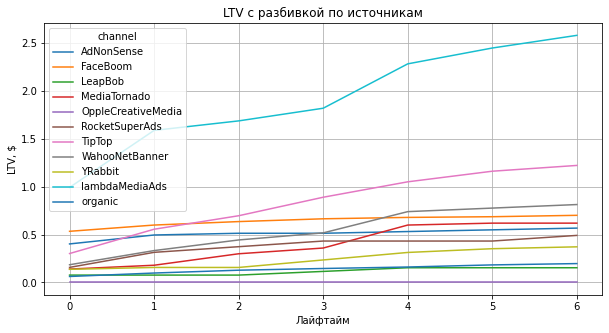

In [38]:
# находим LTV с разбивкой по каналам привлечения
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2019, 5, 13).date(), 7, dimensions=['channel']
)

# таблица LTV
display(ltv)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [39]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
2019-05-06,1014
2019-05-07,888


In [40]:
# считаем средний CAC по каналам привлечения

profiles = profiles.query('channel!="organic"')
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)
display(cac)

print(cac.mean())

,cac
channel,
AdNonSense,1.023561
FaceBoom,1.098401
LeapBob,0.197077
MediaTornado,0.228480
OppleCreativeMedia,0.244718
RocketSuperAds,0.550453
TipTop,1.012097
WahooNetBanner,0.568889
YRabbit,0.282353


cac    0.540705
dtype: float64


In [41]:
profiles.describe()

,user_id,acquisition_cost
count,9.356900e+04,93569.000000
mean,4.995116e+11,1.127481
std,2.881600e+11,0.990503
min,5.993260e+05,0.124615
25%,2.506301e+11,0.257143
50%,4.972331e+11,1.080531
75%,7.490889e+11,1.128571
max,9.999799e+11,3.715385


Медианная стоимость привлечения одного пользователя составляет 0.25, а среднее 0.7, то есть в разные периода затраты на рекламы были выше обычного и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. 

Затраты на привлечение органических пользователей нулевые, поэтому они всегда окупаются. Самые высокая средняя стоиомсть привлечения клиентов - с платформы FaceBoom

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [42]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

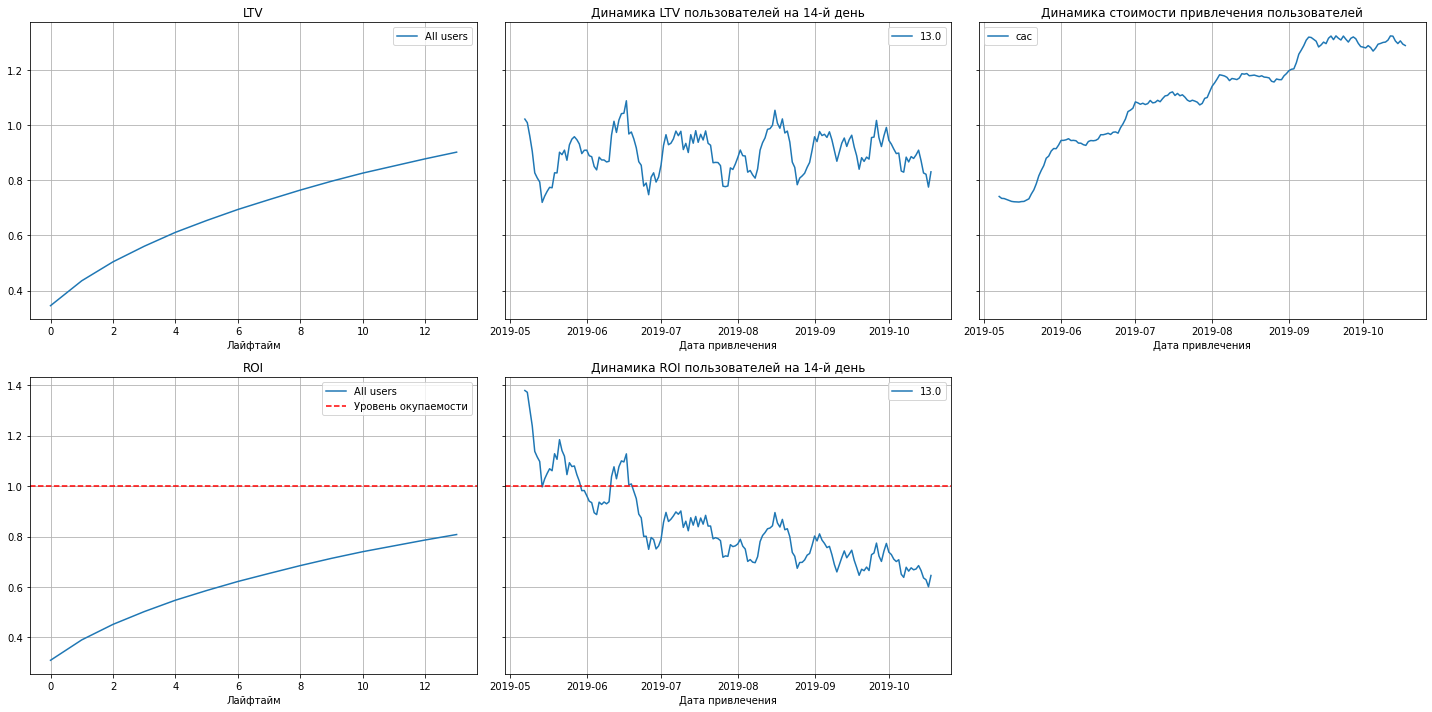

In [43]:
# считаем LTV и ROI

profiles = profiles.query('channel!="organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [44]:
profiles.shape

(93569, 9)

По графикам можно сделать такие выводы:

- Реклама не окупается. ROI в конце недели — около 70%.
- CAC не стабилен, заметно увеличение рекламного бюджета.
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

- Проанализируем окупаемость рекламы с разбивкой по странам

Начнём с разбивки по странам: передадим параметру dimensions столбец region

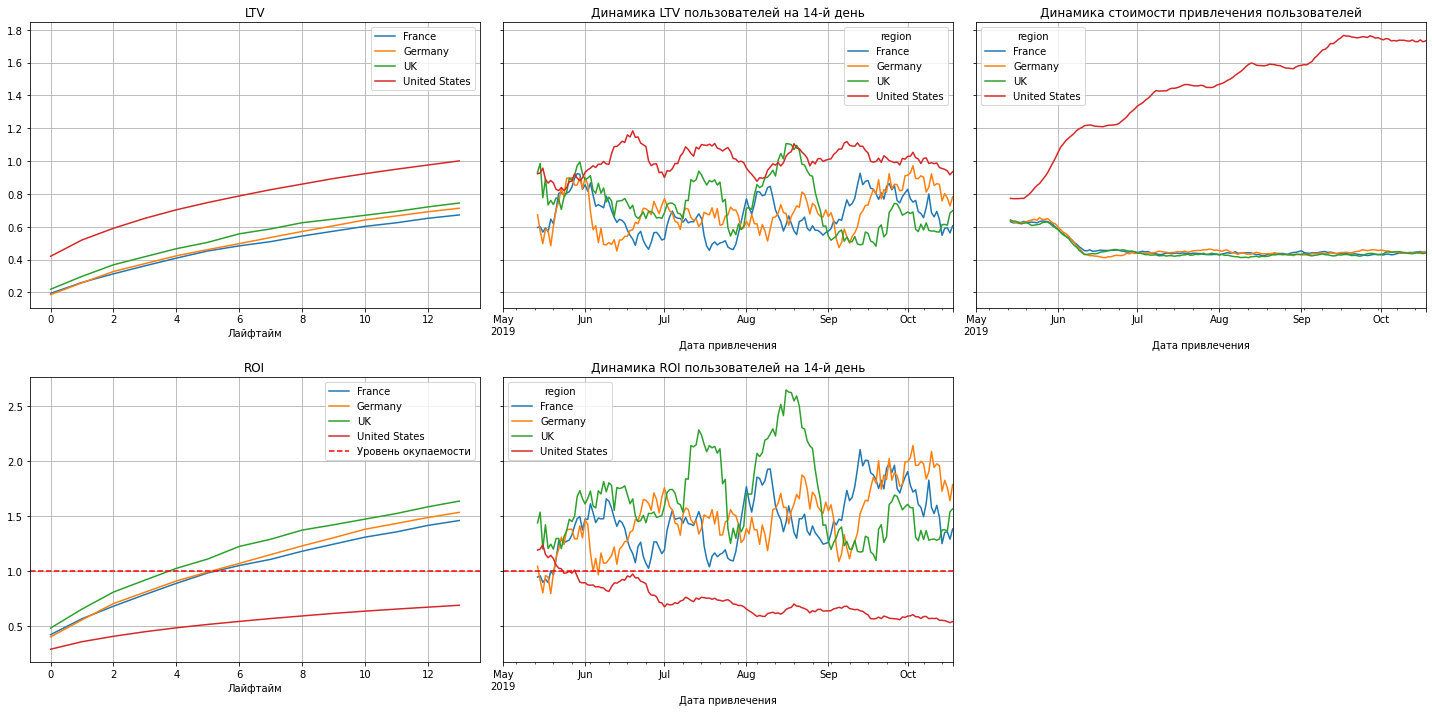

In [45]:
# смотрим окупаемость с разбивкой по устройствам

profiles = profiles.query('channel!="organic"')
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Судя по графику, самый высокий LTV — у пользователей из США. Затем идут Германия, Франция и Великобритания.Показатели всех стран достаточно стабильны. Согалсно этому графику пользователи США должны приносить самую высокую выручку компании. По графику динамики LTV видно, что наблюдается сезоный всплект в период с июля по август.
- Судя по показателю RIO реклама в странах Франция,  Германия и Великобритания окупилась полностью, в вот в США полностью провалилась. При этом на 3-м графике видно, что стоимость привлечения новых пользователей в США самая высокая и при этом неэффективная. Главный принцип успешных инвестиций в маркетинг и не только — затраты не должны превышать полученный в результате доход. Если клиенты приносят компании миллионы, а на их привлечение она тратит миллиарды, это принесёт лишь убытки. То есть необходимо пересмореть затраты на рекламу в США. В остальных странах стоимость привлечения стабильна и одинакова.

То есть выявлен один фактор, почему приложение Procrastinate Pro+ теропит убытка - это неоправданно высокая стоиомость рекламы в США. Необходимо пересмотреть целесообразность вложений в рекламу в этой стране. Возможно пользователи переходят на сайт самостоятельно, а не благодаря рекламе. Также можно ориентироваться на реламную кампанию в других странах, так как в них эти вложения полностью окупаютсяю

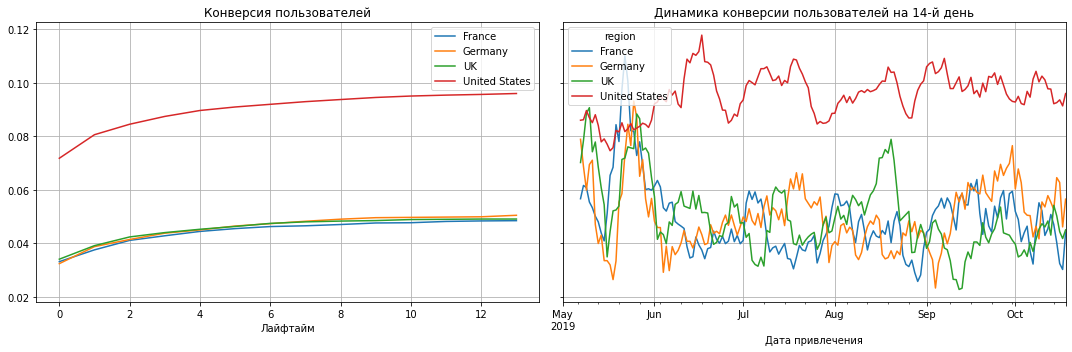

In [46]:
# смотрим конверсию с разбивкой по странам

profiles = profiles.query('channel!="organic"')

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

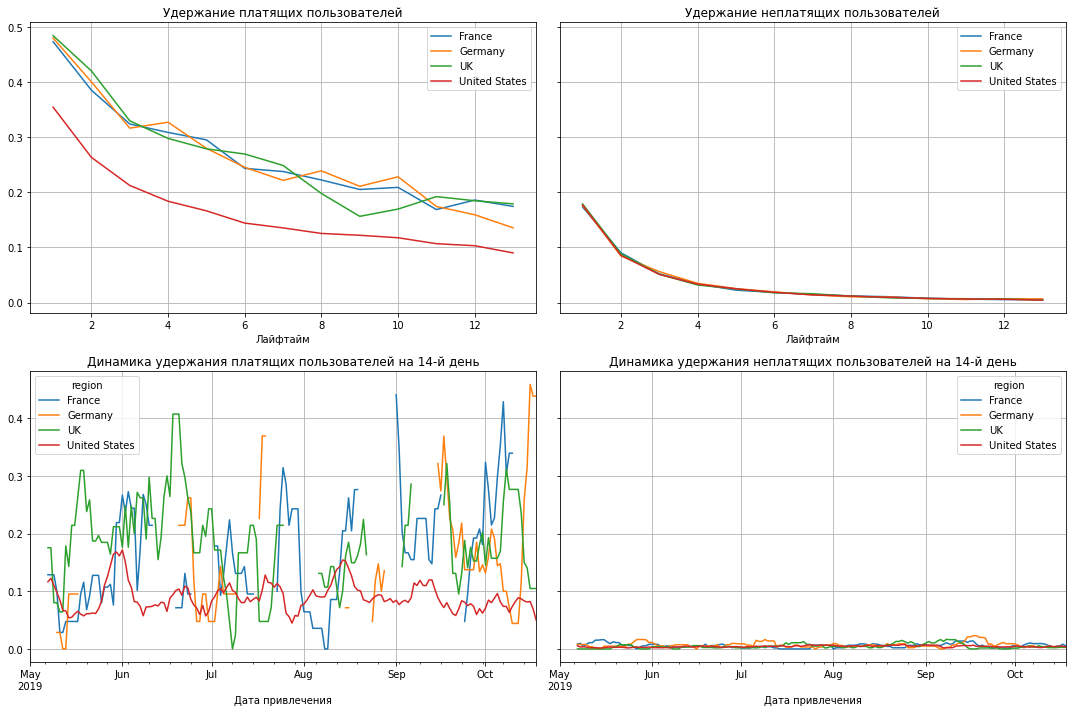

In [47]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Графики с удержанием подтвердили, что пользователи из США стабильно плохо удерживаются.Скорее всего, причина в какой-нибудь технической проблеме.

- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

Теперь проверим источники привлечения (channel). Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

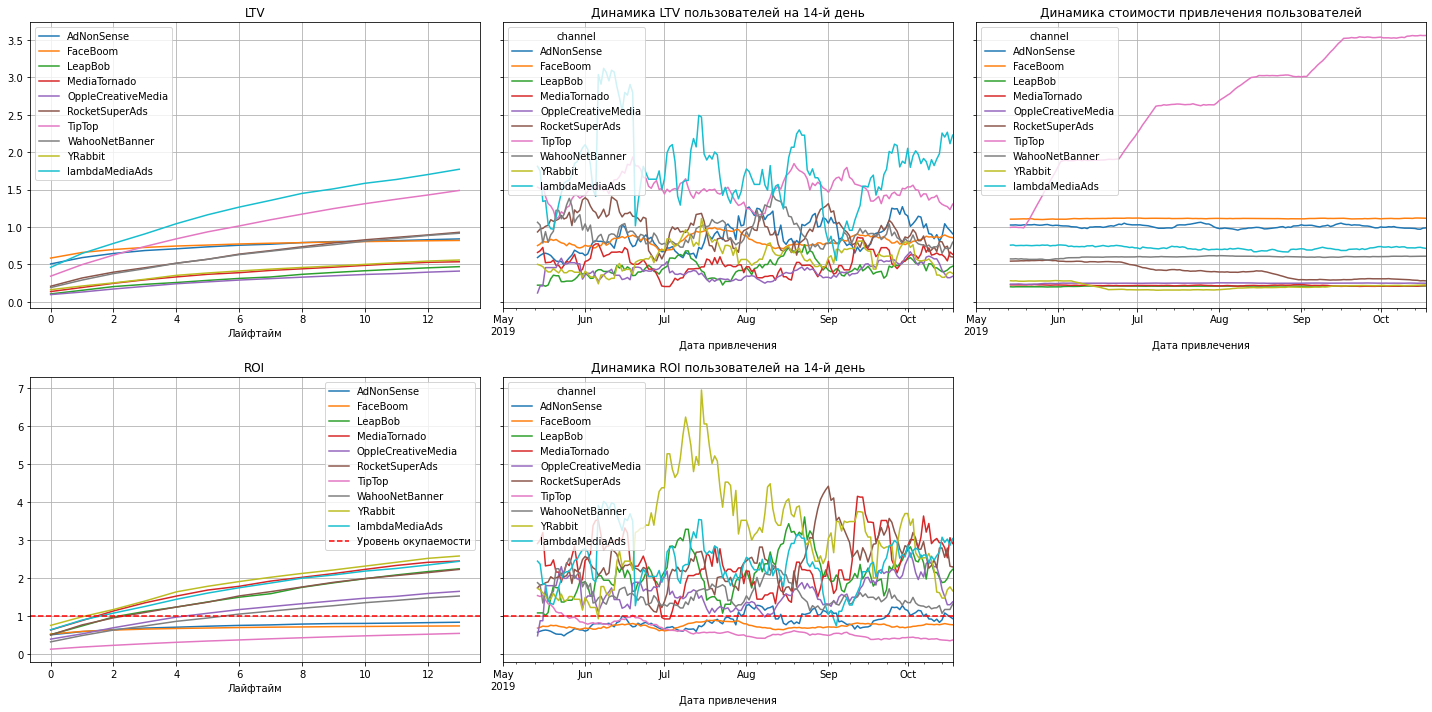

In [48]:
# смотрим окупаемость с разбивкой по источникам привлечения

profiles = profiles.query('channel!="organic"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Снова виден явно выбивающиймя и убыточный идентификатор рекламного источника, из которого пришел пользователь - платформа TipTop. На эту платформы заложена одна из самых высоких стоимостей привечения пользователей, при этом по прибыли, согласно данным графикам RIO - это самая убыточная платформа, которая не окупается. Также следует обратить внимание на платформу FaceBoom - по затратая на привлечение она на втором месте после TipTop, при этом также не окупается и приносит убытки. Еще одие рекламный источник - LeapBob - по стоиомсти привлечения этот источик аналогичен всем оставшимся, но он в отличае от других, не окуапется. То есть, возможно, также стоит посмотреть на целесообразность использования этой рекламной платформы.

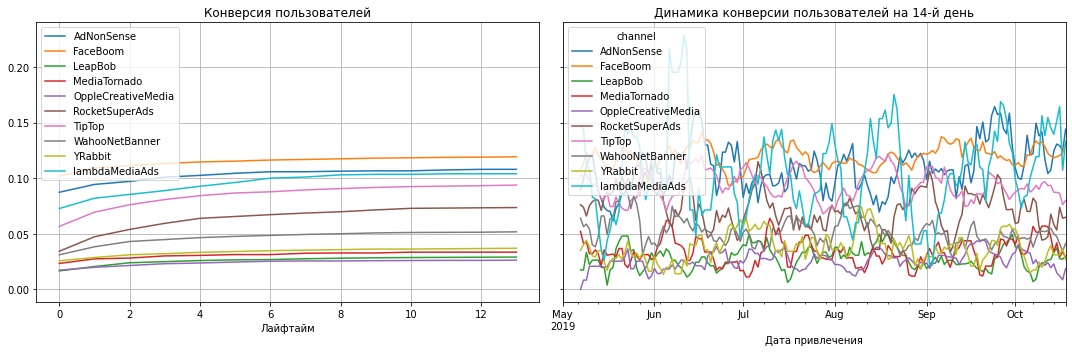

In [49]:
# смотрим конверсию с разбивкой по каналам

profiles = profiles.query('channel!="organic"')

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

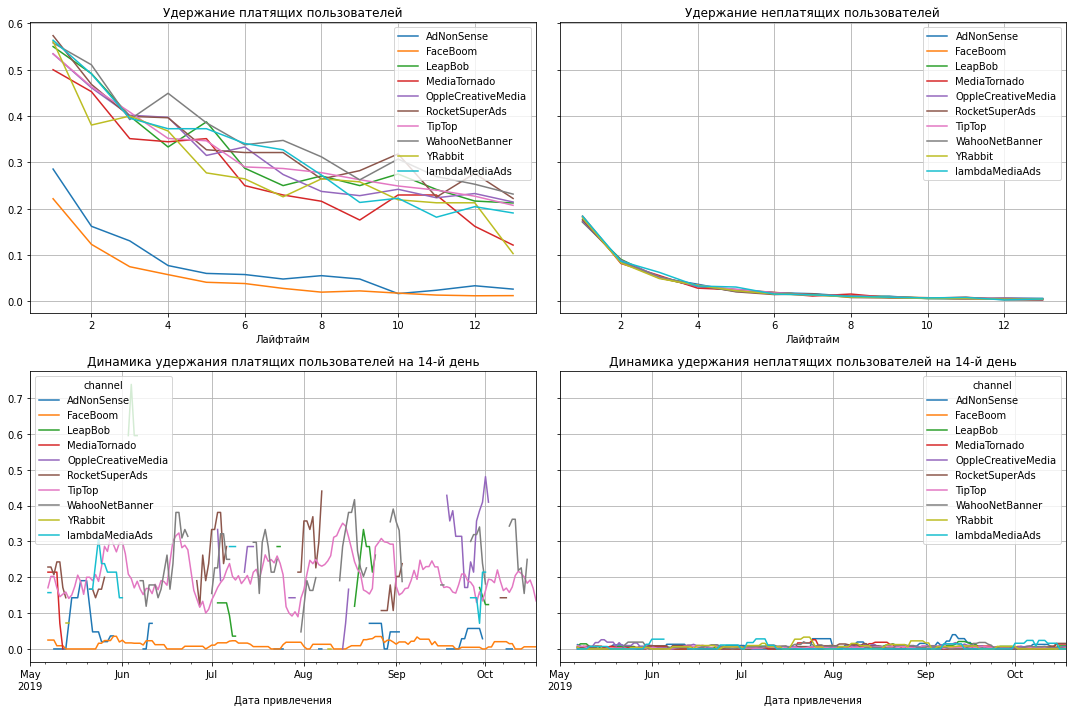

In [50]:
# смотрим удержание с разбивкой по каналам

profiles = profiles.query('channel!="organic"')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Графики с удержанием подтвердили, что пользователи из FaceBoom стабильно плохо удерживаются.Скорее всего, причина в какой-нибудь технической проблеме.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

Перейдём к устройствам.

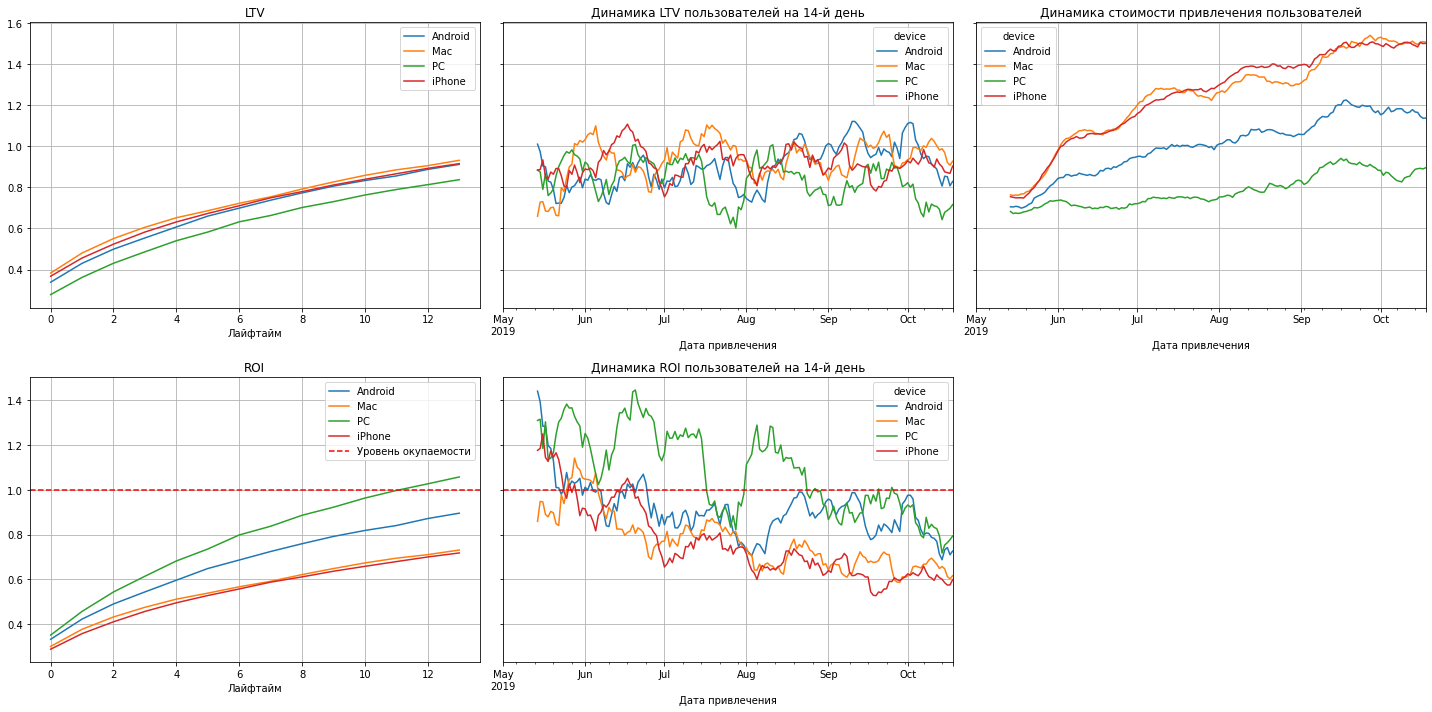

In [51]:
# смотрим окупаемость с разбивкой по устройствам
profiles = profiles.query('channel!="organic"')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Все устройства стабильно не окупаются, но при этом стоиомть привлечения стабильно высокая, особенно по устройстам Mac и iPhone.

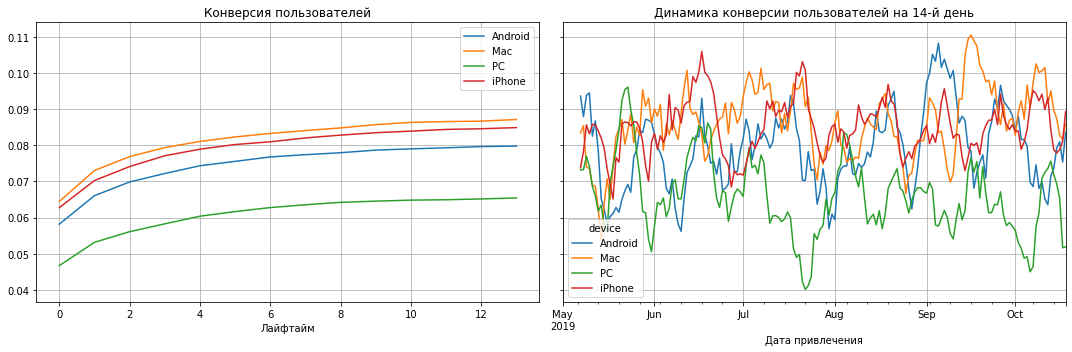

In [52]:
# смотрим конверсию с разбивкой по устройствам
profiles = profiles.query('channel!="organic"')
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac и iPhone конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

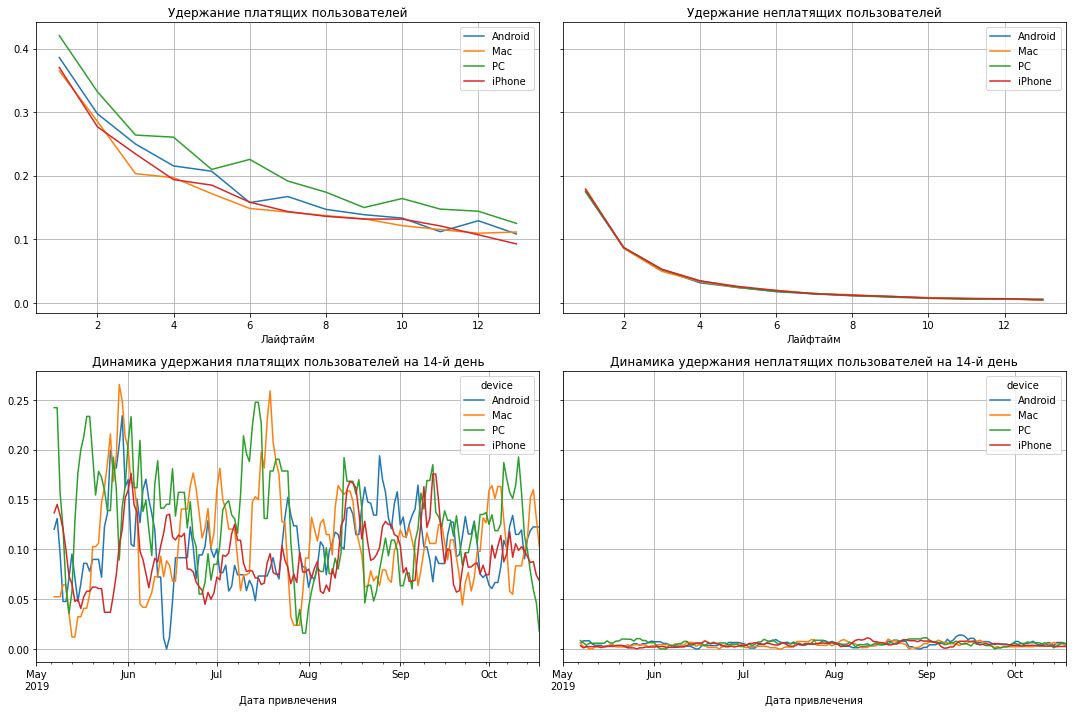

In [53]:
# смотрим удержание с разбивкой по устройствам
profiles = profiles.query('channel!="organic"')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, пользователи iPhone удерживаются хуже, чем пользователи других устройств.

## Итоговые выводы

Из проведенного анализа можно сделать вывод, что самый популярный источник привлечения новых пользователей - источника Organic а реже всего приходили из источника lambdaMediaAds. При этом стоимость привлечения «органических» пользователей во всех когортах равна нулю, потому что они скачали приложения Procrastinate Pro+ самостоятельно, а не благодаря рекламе. Самая дорогая реклама для привлечения пользователей - с платформы TipTop. Чаще всего приходили из региона США пользователи iPhone, по всем остальным регионам наблюдается примерно одинаковое количество. Реклама в целом не окупается. CAC не стабилен, заметно увеличение рекламного бюджета.
Самый высокий LTV — у пользователей из США. Затем идут Германия, Франция и Великобритания. Показатели всех стран достаточно стабильны. Согласно этому графику пользователи США должны приносить самую высокую выручку компании. По графику динамики LTV видно, что наблюдается сезонный всплеск в период с июля по август.
Реклама в странах Франция, Германия и Великобритания окупилась, в вот в США полностью провалилась. При этом выявлено, что стоимость привлечения новых пользователей в США самая высокая и при этом неэффективная. Главный принцип успешных инвестиций в маркетинг и не только — затраты не должны превышать полученный в результате доход. Если клиенты приносят компании миллионы, а на их привлечение она тратит миллиарды, это принесёт лишь убытки. То есть необходимо пересмотреть затраты на рекламу в США. В остальных странах стоимость привлечения стабильна и одинакова. Необходимо пересмотреть целесообразность вложений в рекламу в этой стране. Возможно пользователи переходят на сайт самостоятельно, а не благодаря рекламе. Также можно ориентироваться на рекламную кампанию в других странах, так как в них эти вложения полностью окупаются
Также выявлен убыточный идентификатор рекламного источника, из которого пришел пользователь - платформа TipTop. На эту платформы заложена самая высокая стоимость привлечения пользователей, при этом по прибыли, согласно данным графикам RIO - это самая убыточная платформа, которая не окупается. Также следует обратить внимание на платформу FaceBoom - по затратам на привлечение она на втором месте после TipTop, при этом также не окупается и приносит убытки. Еще один рекламный источник - LeapBob - по стоимости привлечения этот источник аналогичен всем оставшимся, но он в отличае от других, не окупается. То есть, возможно, также стоит посмотреть на целесообразность использования этой рекламной платформы.


Убыточность рекламы может быть обусловлена отсутствием уникального торгового предложения и конкурентных преимуществ. 
Несмотря на развитость рынка, на нём периодически появляются новые товары или услуги, которые пока не могут похвастаться распространённостью. Использовать в этом случае контекстную рекламу не стоит, вероятность того, что она не окупится из-за большого количества отказов, высока. Если вы планируете продавать новинку, нужно тщательно проработать стратегию от А до Я.
Ещё одна причина того, что реклама ничем не помогает вашему сайту, − сезонность (на графиках были выявлены сезонные пики, необходимо выявить причины).
Больше внимания необходимо уделять не привлечению новых клиентов, а повышению лояльности среди тех, кто уже пользуется вашими продуктами. Это логично — если люди будут довольны вашим бизнесом, заработает сарафанное радио и новые клиенты придут сами.
Запустите рассылку: собирайте адреса почты при покупке, отправляйте клиентам полезные материалы и эксклюзивные скидки. Только не будьте навязчивыми, иначе ваши письма отправятся в спам.Чтобы увеличить продажи, дайте покупателю возможность сравнивать цены и как бы цепляться за самый выгодный вариант — в маркетинге это называют якорным эффектом.